# <목표>  
  
연도별 평균소득분포 구해서  
과금액 감소가 시기의 영향을 받은게 아닌지  << 경제가 어려워서 과금액이 줄어든게아닐까?  
실제 소득액에서 과금액이 차지하는 비율을 확인해보고 비교  

In [5]:
import pandas as pd
df1 = pd.read_csv("Data/18_Charge_data.csv", encoding="cp949")
df1

,Unnamed: 0,고객ID,과금일,과금액
0,0,C-10001,2020-04-01,84600
1,1,C-10001,2020-05-01,83500
2,2,C-10001,2020-06-01,85700
3,3,C-10001,2020-07-01,83500
4,4,C-10001,2020-08-01,84600
...,...,...,...,...
291329,291329,C-17043,2021-08-01,68300
291330,291330,C-17043,2021-09-01,69500
291331,291331,C-17043,2021-10-01,68300
291332,291332,C-17043,2021-11-01,69500


In [2]:
df2 = pd.read_excel("Data/가구1.xlsx")
df2

,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021
0,20대,"7,373","6,956","7,489","7,301","7,796","7,241","8,590"
1,30대,"19,207","20,109","21,904","23,415","23,723","25,385","28,827"
2,40대,"26,467","29,125","31,246","34,667","36,278","37,359","43,162"
3,50대,"34,940","36,113","37,026","39,621","40,024","40,987","46,666"
4,60대,"31,346","32,218","33,772","36,358","36,804","37,422","43,211"


In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df3 = pd.read_csv("Data/18_Customer_data.csv", encoding="cp949")

df3["연령대"] = "0"

for i in range(0, len(df3)):
    df3["연령대"][i] = f"{int(list(str(df3["연령"][i]))[0])}0대"

df3

,Unnamed: 0,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,...,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금,연령대
0,0,C-10001,여성,37,Yes,No,0,2,Yes,신용카드,...,No,65,NaN,NaN,2205,3,0,47910,431100,30대
1,1,C-10002,남성,46,No,No,0,0,No,신용카드,...,No,66,NaN,NaN,5414,5,11300,12090,108710,40대
2,2,C-10003,남성,50,No,No,0,0,Yes,계좌이체,...,Yes,71,Competitor,Price too high,4479,1,0,38080,152100,50대
3,3,C-10004,남성,78,Yes,No,0,1,Yes,계좌이체,...,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720,70대
4,4,C-10005,여성,75,Yes,No,0,3,Yes,신용카드,...,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970,70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,No,No,0,0,No,신용카드,...,No,59,NaN,NaN,3161,4,0,52770,685680,20대
6859,6859,C-17040,남성,40,Yes,No,0,1,Yes,계좌이체,...,Yes,68,Dissatisfaction,Product dissatisfaction,5248,1,0,18310,402730,40대
6860,6860,C-17041,남성,22,No,No,0,0,Yes,신용카드,...,No,33,NaN,NaN,5870,5,0,21020,42040,20대
6861,6861,C-17042,남성,21,No,No,0,5,No,신용카드,...,No,59,NaN,NaN,4792,3,0,2370,160460,20대


In [11]:
import pandas as pd

# 연도 추출
df1['연도'] = pd.to_datetime(df1['과금일']).dt.year  

# 고객별 연도별 총 과금액 계산
df1_grouped = df1.groupby(['고객ID', '연도'])['과금액'].sum().reset_index()

# df2: 연령별 평균소득을 long format으로 변환
df2_melted = df2.melt(id_vars=['Unnamed: 0'], var_name='연도', value_name='평균소득')
df2_melted.rename(columns={'Unnamed: 0': '연령대'}, inplace=True)
df2_melted['연도'] = df2_melted['연도'].astype(int)

# 🚀 쉼표 제거 후 숫자로 변환
df2_melted['평균소득'] = df2_melted['평균소득'].astype(str).str.replace(',', '').astype(int)

# 고객 연령대 매칭 (고객 정보 df3이 있다고 가정)
df_merged = df1_grouped.merge(df3[['고객ID', '연령대']], on='고객ID')
df_final = df_merged.merge(df2_melted, on=['연도', '연령대'])

# 과금액이 소득에서 차지하는 비율 계산
df_final['소득대비 과금 비율'] = df_final['과금액'] / df_final['평균소득']

print(df_final.head())

      고객ID    연도      과금액  연령대   평균소득  소득대비 과금 비율
0  C-10001  2020   753600  30대  25385   29.686823
1  C-10001  2021  1001800  30대  28827   34.752142
2  C-10002  2020   619700  40대  37359   16.587703
3  C-10002  2021   827800  40대  43162   19.178907
4  C-10003  2020   292700  50대  40987    7.141289


# 연도별 평균 소득 대비 과금 비율 변화 - 라인차트

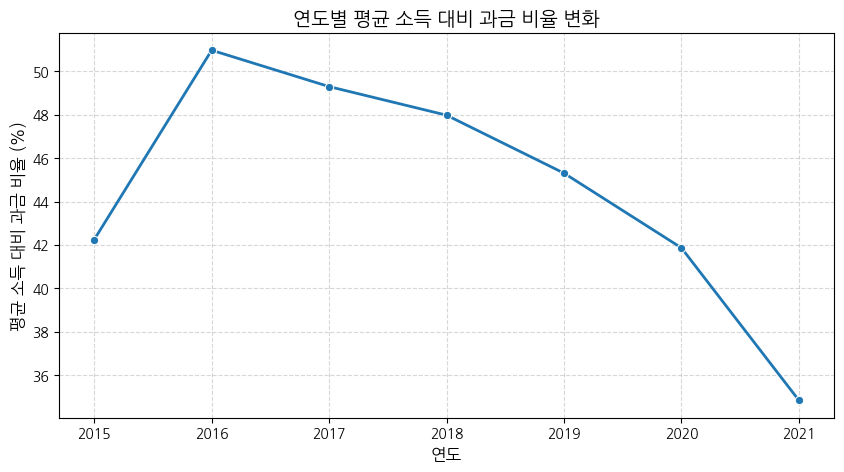

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 

# 연도별 평균 소득 대비 과금 비율 계산
df_yearly = df_final.groupby("연도")["소득대비 과금 비율"].mean().reset_index()

# 라인 차트 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, x="연도", y="소득대비 과금 비율", marker="o", linewidth=2)

plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 소득 대비 과금 비율 (%)", fontsize=12)
plt.title("연도별 평균 소득 대비 과금 비율 변화", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# 연령대별 소득 대비 과금 비율 분포 - 박스플롯

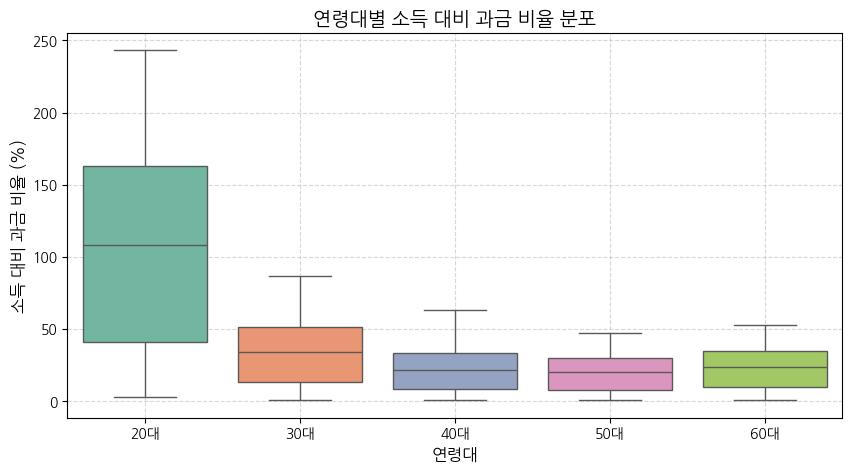

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 연령대 순서 지정
age_order = ["20대", "30대", "40대", "50대", "60대"]
df_final["연령대"] = pd.Categorical(df_final["연령대"], categories=age_order, ordered=True)

# 박스플롯 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, x="연령대", y="소득대비 과금 비율", order=age_order, palette="Set2")

plt.xlabel("연령대", fontsize=12)
plt.ylabel("소득 대비 과금 비율 (%)", fontsize=12)
plt.title("연령대별 소득 대비 과금 비율 분포", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


# 연도 & 연령대별 과금 비율 히트맵

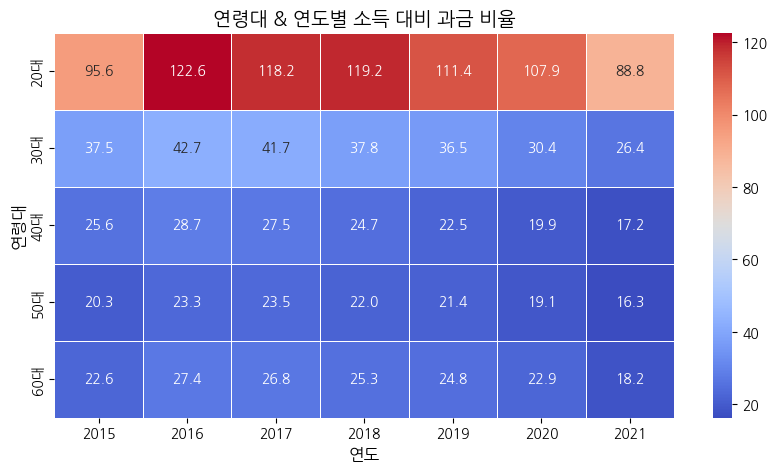

In [16]:
df_pivot = df_final.pivot_table(index="연령대", columns="연도", values="소득대비 과금 비율", aggfunc="mean")

plt.figure(figsize=(10, 5))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.xlabel("연도", fontsize=12)
plt.ylabel("연령대", fontsize=12)
plt.title("연령대 & 연도별 소득 대비 과금 비율", fontsize=14)
plt.show()

"2015년 20대 고객들의 평균 과금액이 평균 소득의 95.6% 수준이었다."

즉, 20대의 평균 소득이 100만 원이라면, 95.6만 원을 과금했다는 뜻

1️⃣ 과금 비율이 높을수록 소득의 많은 부분을 과금에 사용했다는 의미  
95.6% → 거의 소득의 전부를 과금  
일반적으로 20~30% 이하면 과금 부담이 적다고 볼 수 있음  
  
2️⃣ 연도별 추이 확인  
2015년에 비해 이후 연도에서 비율이 증가 or 감소하는지 확인  
경제 상황, 정책 변화, 소득 증가 등이 영향을 미쳤는지 해석 가능  
   
3️⃣ 연령대별 비교  
40~50대의 비율이 낮고, 20대의 비율이 유독 높다 → 젊은 층에서 과금 소비가 집중되었음을 의미

문제점:  
-전체적으로 소득 대비 과금 비율이 감소하는 추세  
-특히 30~50대의 감소폭이 큼 → 과금 유도 전략 필요  
  
📌 해결책:  
✅ 20대: VIP 시스템 강화, 구독 모델 도입  
✅ 30 ~ 40대: 소액 과금 혜택 확대, 복귀 유저 유입  
✅ 50 ~ 60대: 결제 UX 개선, 가족 연계 서비스 도입  

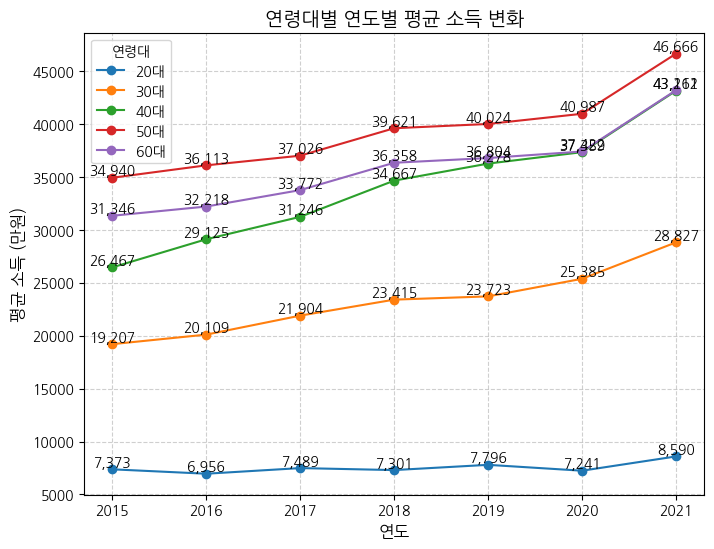

In [60]:
import matplotlib.pyplot as plt

# 연령대 리스트
age_groups = ["20대", "30대", "40대", "50대", "60대"]

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 각 연령대별 라인 그래프 그리기
for age in age_groups:
    # 해당 연령대 데이터 추출
    y_values = df2[df2["Unnamed: 0"] == age].values.flatten()[1:]
    
    # 쉼표가 포함된 문자열을 숫자로 변환
    y_values = [float(y.replace(",", "")) for y in y_values]
    
    # 연도별 데이터 플롯
    plt.plot(df2.columns[1:], y_values, marker="o", label=age)
    
    # 각 데이터 포인트 위에 값 표시
    for x, y in zip(df2.columns[1:], y_values):
        plt.text(x, y, f"{y:,.0f}", fontsize=10, ha="center", va="bottom")

# 그래프 스타일 설정
plt.xlabel("연도", fontsize=12)
plt.ylabel("평균 소득 (만원)", fontsize=12)
plt.title("연령대별 연도별 평균 소득 변화", fontsize=14)
plt.legend(title="연령대")
plt.grid(True, linestyle="--", alpha=0.6)

# y축 범위 고정
# plt.ylim(0, 50)

# 그래프 표시
plt.show()